<a href="https://colab.research.google.com/github/rubengamarro/practicas-aprendizaje-supervisado/blob/main/2_TAREA_Algoritmos_Avanzados_de_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EJERCICIO 1

**Apartado a**

In [ ]:
import numpy as np
rng=np.random.default_rng(seed=5)
MatCov = np.array([[6, -3], [-3, 3.5]])
X_v1 = rng.multivariate_normal([0, 0], MatCov, size=150)
radios2 = X_v1[:, 0]**2 + X_v1[:, 1]**2
y_v1 = np.where(radios2 > 1.5, 1, -1)
pos_neg1 = np.logical_and(X_v1[:, 0] < 0,
X_v1[:, 1] < 0)
pos_neg2 = np.logical_and(np.logical_and(X_v1[:, 0] > -2.5,
X_v1[:, 0] < -1.5),
np.logical_and(X_v1[:, 1] < 2.5,
X_v1[:, 1] > 1.25))
y_v1=y_v1.copy()
y_v1[pos_neg1 == True]=-1
y_v1[pos_neg2 == True]=-1

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def pintar_regiones_decision_v2(X, y, clasificador, test_idx=None, resolucion=0.02):
    # Configurar los marcadores y el mapa de color
    marcadores = ('s', 'x', 'o', '^', 'v')
    colores = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    # Asignación de colores a las clases
    cmap = ListedColormap(colores[:len(np.unique(y))])

    # Preparar los márgenes de la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Preparar los valores puntuales de la superficie de decisión y el valor del
    # clasifidor para dichos puntos
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolucion),
                           np.arange(x2_min, x2_max, resolucion))

    # Pasamos la entrada a matriz con dos columnas para calcular la salida del
    # clasificador
    # Ojo, hemos puesto predict para usar la terminología estandar de las
    # bibliotecas que vamos a usar
    Z = clasificador.predict(np.array([xx1.reshape(-1), xx2.reshape(-1)]).T)
    # Convertimos la salida predicha al formato adecuado para pintar la
    # superficie
    Z = Z.reshape(xx1.shape)

    # Pintar el contorno de la superficie de decisión y se rellena también
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Pintar todas las muestras en la superficie de decisión
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0],
                     y=X[y == cl, 1],
                     alpha=0.8,
                     c=colores[idx],
                     marker=marcadores[idx],
                     label=cl,
                     edgecolor='black')

    # Marcar las que son muestras de test
    if test_idx:
        # Dibujar todas las muestras
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Conjunto de test')

<ipython-input-1485-96ca87cc06b1>:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


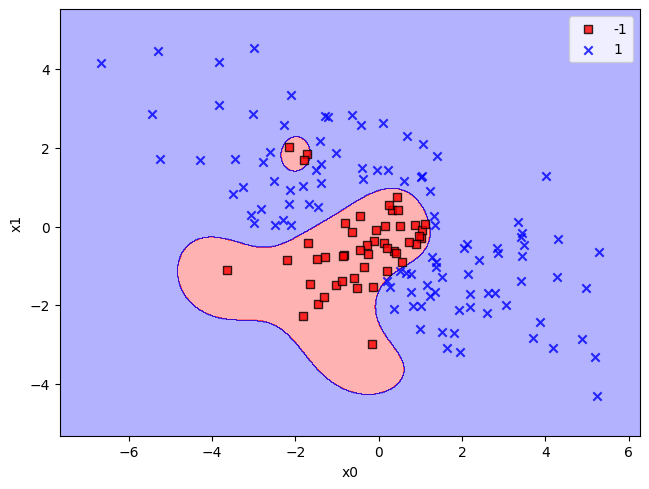

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=10, gamma=0.55, C=10.0)
svm.fit(X_v1, y_v1)

pintar_regiones_decision_v2(X_v1, y_v1, clasificador=svm)

plt.tight_layout()
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend(loc='best')
plt.show()

**Apartado b**

Hemos utilizado gamma = 0.55 y C = 10. Para entrenar el modelo de manera que ninguna muestra sea mal clasificada, hemos aumentado gamma de 0.20 a 0.55. Aumentar gamma hace que se reduzca el error de entrenamiento porque crea una frontera de decisión muy precisa, pero hace que el modelo generalice peor y puede provocar sobreajuste, ya que intenta clasificar perfectamente cada punto de entrenamiento. Otra manera de conseguir que el modelo clasifique bien todas las muestras sería aumentar la constante de penalización *C*, de manera que reduciría el valor de las variables de holgura, lo cual también provocaría una peor generalización.

**Apartado c**

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_v1)
errors = np.sum(y_pred != y_v1)
accuracy = accuracy_score(y_v1, y_pred)
print(f"Errores de clasificación: {errors}")
print(f"Exactitud del modelo: {accuracy:.2f}")

Errores de clasificación: 0
Exactitud del modelo: 1.00


#EJERCICIO 2

**Apartado a**

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X_completo = iris.data[:, [2, 3]]
y_completo = iris.target
print('Etiquetas de las clases:', np.unique(y_completo))

Etiquetas de las clases: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(X_completo, y_completo, test_size=0.3,
                                                    random_state=10, stratify=y_completo)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_entrenamiento)
X_entrenamiento_std = sc.transform(X_entrenamiento)
X_test_std = sc.transform(X_test)

<ipython-input-1485-96ca87cc06b1>:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


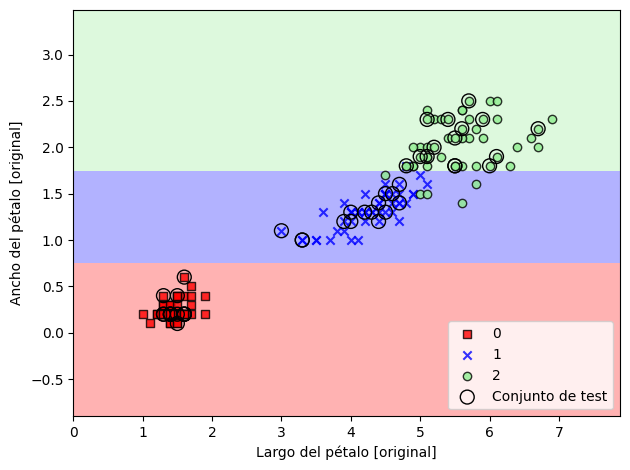

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arbolD = DecisionTreeClassifier(criterion='entropy', max_depth=2, #Entiendo que el menor numero de preguntas pero que clasifique todas las clases es profundidad 2.
                                    random_state=10)
arbolD.fit(X_entrenamiento, y_entrenamiento)
X_entYtest = np.vstack((X_entrenamiento, X_test))
y_entYtest = np.hstack((y_entrenamiento, y_test))
pintar_regiones_decision_v2(X_entYtest,
                      y_entYtest,
                      clasificador=arbolD,
                      test_idx=range(105, 150))
plt.xlabel('Largo del pétalo [original]')
plt.ylabel('Ancho del pétalo [original]')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

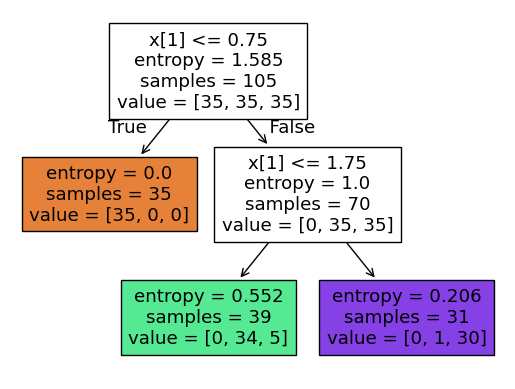

In [ ]:
from sklearn import tree
tree.plot_tree(arbolD, filled = True)
plt.show()

**Apartado b**

En el peor de los casos, para clasificar una muestra, habría que hacer el mismo número de preguntas que profundidad tiene el árbol, es decir, 2 en este caso.

**Apartado c**

Uno que tenga profundidad 5 estará mejor ajustado, ya que clasificará mejor las muestras de entrenamiento. Pero al aumentar la profundidad del árbol pierde generalidad y puede haber sobreajuste. Veámoslo.

<ipython-input-1485-96ca87cc06b1>:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


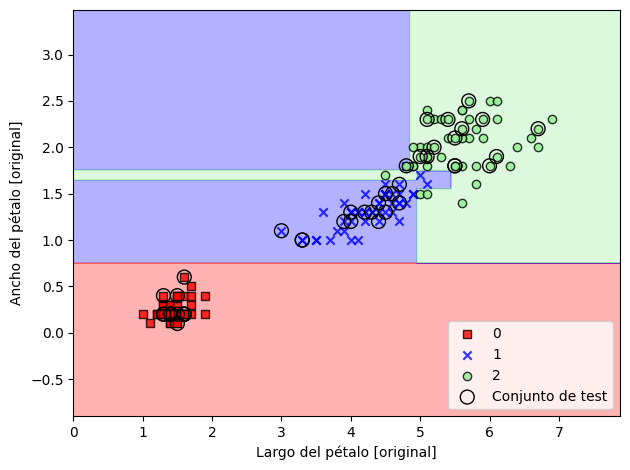

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arbolD2 = DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                    random_state=10)
arbolD2.fit(X_entrenamiento, y_entrenamiento)
X_entYtest = np.vstack((X_entrenamiento, X_test))
y_entYtest = np.hstack((y_entrenamiento, y_test))
pintar_regiones_decision_v2(X_entYtest,
                      y_entYtest,
                      clasificador=arbolD2,
                      test_idx=range(105, 150))
plt.xlabel('Largo del pétalo [original]')
plt.ylabel('Ancho del pétalo [original]')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

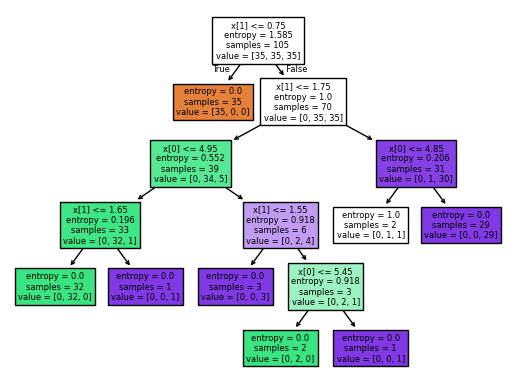

In [ ]:
from sklearn import tree
tree.plot_tree(arbolD2, filled = True)
plt.show()

Como podemos ver, este modelo está más ajustado, ya que clasifica mejor cada muestra de entrenamiento, pero esto no significa que el modelo vaya a tener mejor precisión.

#EJERCICIO 3

**Apartado a y b**

In [ ]:
import numpy as np
rng=np.random.default_rng(seed=5)
MatCov = np.array([[6, -3], [-3, 3.5]])
X_v1 = rng.multivariate_normal([0, 0], MatCov, size=150)
radios2 = X_v1[:, 0]**2 + X_v1[:, 1]**2
y_v1 = np.where(radios2 > 1.5, 1, -1)
pos_neg1 = np.logical_and(X_v1[:, 0] < 0,
X_v1[:, 1] < 0)
pos_neg2 = np.logical_and(np.logical_and(X_v1[:, 0] > -2.5,
X_v1[:, 0] < -1.5),
np.logical_and(X_v1[:, 1] < 2.5,
X_v1[:, 1] > 1.25))
y_v1=y_v1.copy()
y_v1[pos_neg1 == True]=-1
y_v1[pos_neg2 == True]=-1

In [ ]:
from sklearn.model_selection import train_test_split
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(X_v1, y_v1, test_size=0.3,
                                                    random_state=5, stratify=y_v1)

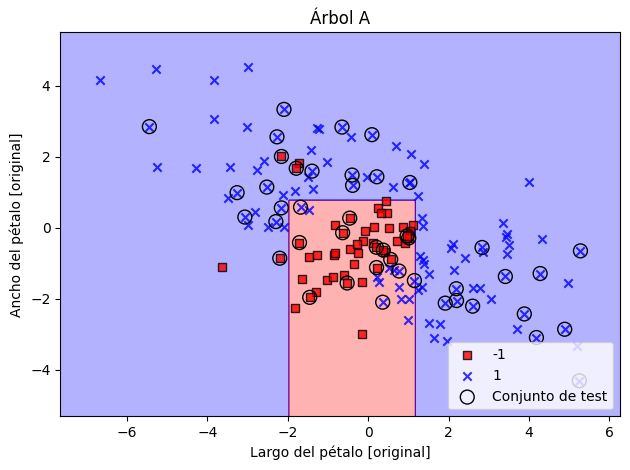

<ipython-input-1485-96ca87cc06b1>:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


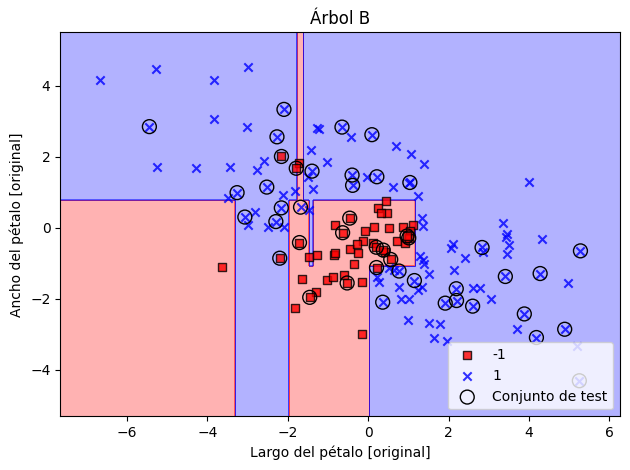

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arbolA = DecisionTreeClassifier(criterion='gini',
                                    max_depth=3,
                                    random_state=5)
arbolA.fit(X_entrenamiento, y_entrenamiento)
X_entYtest = np.vstack((X_entrenamiento, X_test))
y_entYtest = np.hstack((y_entrenamiento, y_test))
pintar_regiones_decision_v2(X_entYtest,
                      y_entYtest,
                      clasificador=arbolA, test_idx=range(105, 150))
plt.title('Árbol A')
plt.xlabel('Largo del pétalo [original]')
plt.ylabel('Ancho del pétalo [original]')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

from sklearn.tree import DecisionTreeClassifier
arbolB = DecisionTreeClassifier(criterion='gini',
                                    max_depth=6,
                                    random_state=5)
arbolB.fit(X_entrenamiento, y_entrenamiento)
X_entYtest = np.vstack((X_entrenamiento, X_test))
y_entYtest = np.hstack((y_entrenamiento, y_test))
pintar_regiones_decision_v2(X_entYtest,
                      y_entYtest,
                      clasificador=arbolB, test_idx=range(105, 150))
plt.title('Árbol B')
plt.xlabel('Largo del pétalo [original]')
plt.ylabel('Ancho del pétalo [original]')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

**Apartado c**

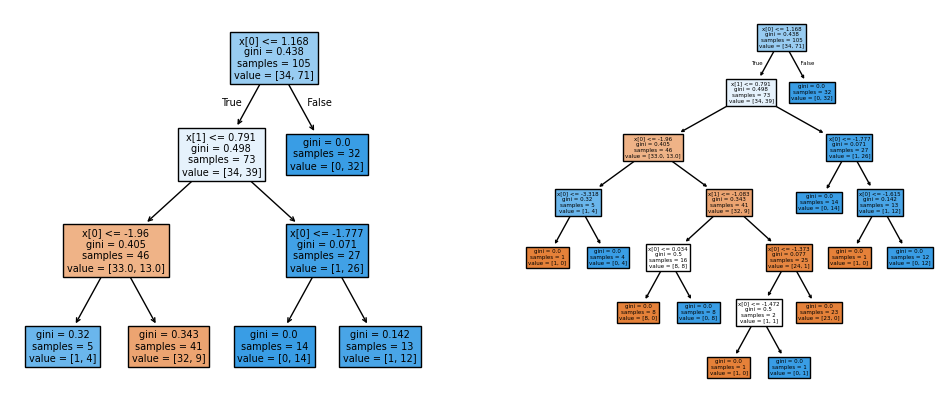

In [ ]:
from sklearn import tree
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
tree.plot_tree(arbolA, filled = True)
plt.subplot(1, 2, 2)
tree.plot_tree(arbolB, filled = True)
plt.show()

**Apartado d**

In [ ]:
accuracy_A = accuracy_score(y_test, arbolA.predict(X_test))
accuracy_B = accuracy_score(y_test, arbolB.predict(X_test))
error_A = 1 - accuracy_A
error_B = 1 - accuracy_B

print(f"Exactitud del Árbol A: {accuracy_A:.2f}")
print(f"Exactitud del Árbol B: {accuracy_B:.2f}")

Exactitud del Árbol A: 0.84
Exactitud del Árbol B: 0.89


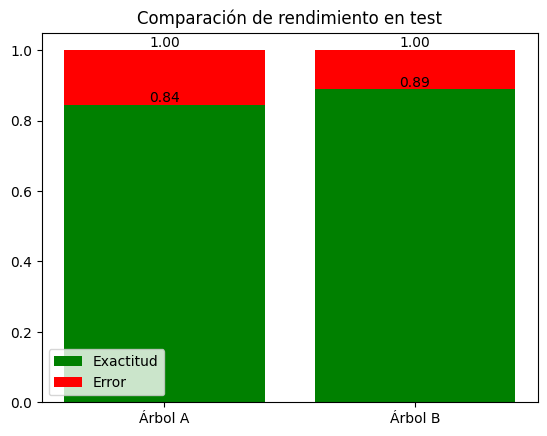

In [ ]:
fig, ax = plt.subplots()
bars1 = ax.bar("Árbol A", accuracy_A, color='green', label='Exactitud')
bars2 = ax.bar("Árbol A", error_A, bottom=accuracy_A, color='red', label='Error')
bars3 = ax.bar("Árbol B", accuracy_B, color='green')
bars4 = ax.bar("Árbol B", error_B, bottom=accuracy_B, color='red')

ax.bar_label(bars1, fmt='%.2f')
ax.bar_label(bars2, fmt='%.2f')
ax.bar_label(bars3, fmt='%.2f')
ax.bar_label(bars4, fmt='%.2f')

plt.title("Comparación de rendimiento en test")
plt.legend()
plt.show()


**Apartado e**

Sí, es necesario, ya que si la diferencia entre la precisión en entrenamiento y en test es muy grande, es posible que el modelo esté sobreajustado. Por otro lado, si el rendimiento es bajo en ambos conjuntos, probablemente el modelo esté subajustado y no haya captado bien los patrones. Un modelo que generaliza bien suele tener resultados similares en ambos conjuntos.

**Apartado f**

En primer lugar calculamos la precisión en entrenamiento.

In [ ]:
accuracy_A_train = accuracy_score(y_entrenamiento, arbolA.predict(X_entrenamiento))
accuracy_B_train = accuracy_score(y_entrenamiento, arbolB.predict(X_entrenamiento))
print(f"Exactitud del Árbol A en entrenamiento: {accuracy_A_train:.2f}")
print(f"Exactitud del Árbol B en entrenamiento: {accuracy_B_train:.2f}")

Exactitud del Árbol A en entrenamiento: 0.90
Exactitud del Árbol B en entrenamiento: 1.00


Tenemos entonces que la diferencia de precisión entre entrenamiento y test es menor en el árbol A, luego diremos que este árbol generaliza mejor. El árbol B tiene una mayor precisión en test, lo que significa que en este caso en particular está clasificando mejor las muestras nuevas. Sin embargo, la precisión en test va a medir el rendimiento actual del modelo en este conjunto específico de datos, mientras que la capacidad de generalización va a medir que tan bien va a funcionar el modelo en datos nuevos que aún no hemos visto. Por tanto, en este caso el árbol B puede estar clasificando mejor porque se ha adaptado bien a estos datos en particular, pero con nuevas muestras podría no tener el mismo rendimiento, si queremos un modelo más robusto para futuros datos el árbol A sería una mejor opción ya que tiene mayor capacidad de generalizar. Contestando a la otra pregunta, diría que el árbol B generaliza peor porque tiene una precisión perfecta en entrenamiento (1.0), pero mucho más baja en test (0.89), lo que significa que ha memorizado demasiado los datos de entrenamiento y tiene tendencia al sobreajuste.


#EJERCICIO 4

In [ ]:
import numpy as np
np.random.seed(15)
X_v4 = np.random.randn(150, 2)
pos_Clase1 = np.logical_and(X_v4[:, 0] > 0, X_v4[:, 1] > 0)
pos_Clase2 = np.logical_and(X_v4[:, 0] < -0.5, X_v4[:, 1] < 0)
y_v4=np.zeros(X_v4.shape[0])
y_v4[pos_Clase1]=1
y_v4[pos_Clase2]=2

In [ ]:
from sklearn.model_selection import train_test_split
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(X_v4, y_v4, test_size=0.3, stratify=y_v4)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_entrenamiento)
X_entrenamiento_std = sc.transform(X_entrenamiento)
X_test_std = sc.transform(X_test)

In [ ]:
X_entYtest_std = np.vstack((X_entrenamiento_std, X_test_std))
y_entYtest = np.hstack((y_entrenamiento, y_test))

Regresión logística:

<ipython-input-1485-96ca87cc06b1>:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


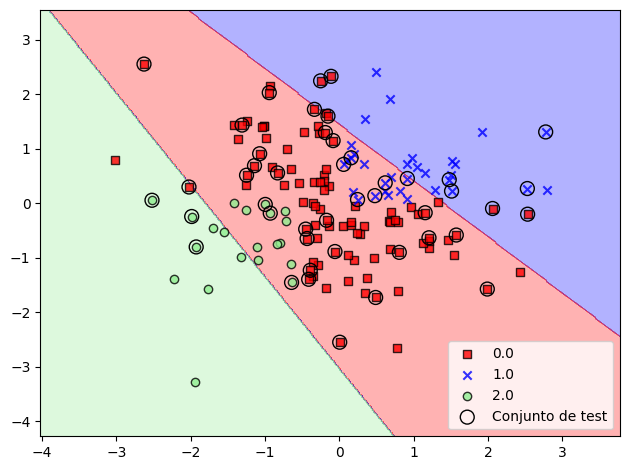

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

neuronaLogistica = OneVsRestClassifier(
                        LogisticRegression(solver='lbfgs'))
neuronaLogistica.fit(X_entrenamiento_std, y_entrenamiento)
pintar_regiones_decision_v2(X_entYtest_std,
                      y_entYtest,
                      clasificador=neuronaLogistica, test_idx=range(105, 150))
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Árboles de decisión:

<ipython-input-1485-96ca87cc06b1>:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


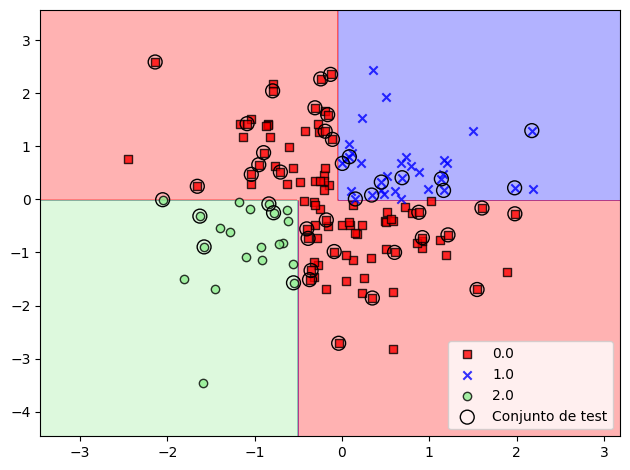

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arbolDec = DecisionTreeClassifier()
arbolDec.fit(X_entrenamiento, y_entrenamiento)
X_entYtest = np.vstack((X_entrenamiento, X_test))
y_entYtest = np.hstack((y_entrenamiento, y_test))
pintar_regiones_decision_v2(X_entYtest,
                      y_entYtest,
                      clasificador=arbolDec,
                      test_idx=range(105, 150))
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Vecinos más cercanos:

<ipython-input-1485-96ca87cc06b1>:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


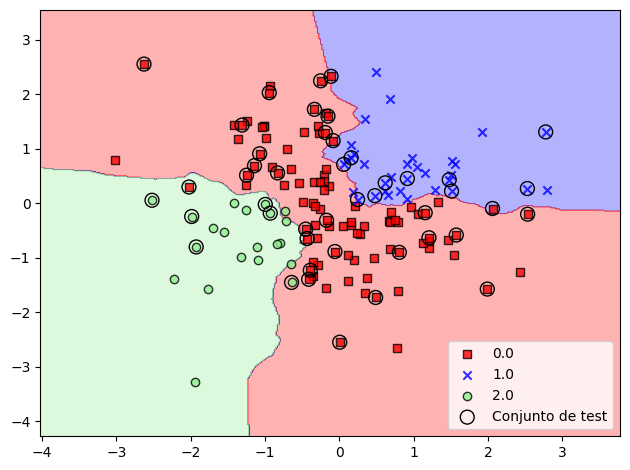

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Nótese como utilizamos los rasgos estandarizados.
knn.fit(X_entrenamiento_std, y_entrenamiento)
pintar_regiones_decision_v2(X_entYtest_std, y_entYtest,
                      clasificador=knn, test_idx=range(105,150))
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

**Apartado b**

Como podemos ver, el modelo que peor clasifica las muestras es la Regresión Logística. Vamos a confirmarlo calculando la precisión de cada método.

In [ ]:
accuracyRegLog = accuracy_score(y_test, neuronaLogistica.predict(X_test))
accuracyTree = accuracy_score(y_test, arbolDec.predict(X_test))
accuracyKNN = accuracy_score(y_test, knn.predict(X_test))

print(f"Exactitud con regresión logística: {accuracyRegLog:.2f}")
print(f"Exactitud con árbol de decisión: {accuracyTree:.2f}")
print(f"Exactitud con KNN: {accuracyKNN:.2f}")

Exactitud con regresión logística: 0.69
Exactitud con árbol de decisión: 0.98
Exactitud con KNN: 0.91


**Apartado c**

La regresión logística no se adapta tan bien a las muestras porque asume que las clases son separables de manera lineal, y en este caso no lo son. Como podemos ver en la gráfica creada anteriormente, la regresión logística genera líneas rectas para graficar la frontera de decisión, mientras que el árbol de decisión puede hacer particiones en varias direcciones y el KNN puede generar una frontera irregular, ya que se basa en los vecinos más cercanos.

#EJERCICIO 5

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('winequality-red.csv', names=['Acidez', 'Acidez volátil', 'Ácido cítrico', 'Azúcar', 'Cloruros', 'DS libre', 'DS total',
'Densidad', 'pH', 'Sulfitos', 'Alcohol', 'Calidad'])
df

,Acidez,Acidez volátil,Ácido cítrico,Azúcar,Cloruros,DS libre,DS total,Densidad,pH,Sulfitos,Alcohol,Calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
X = df.drop(columns=['Calidad'])
y = df['Calidad']

In [ ]:
from sklearn.model_selection import train_test_split
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_entrenamiento)
X_entrenamiento_std = sc.transform(X_entrenamiento)
X_test_std = sc.transform(X_test)

In [ ]:
X_entYtest_std = np.vstack((X_entrenamiento_std, X_test_std))
y_entYtest = np.hstack((y_entrenamiento, y_test))

**Apartado a**

Veamos cuantas calidades de vino distintas hay en el conjunto de muestras:

In [ ]:
print(len(np.unique(y)))

6


Veamos cuales son para ver la calidad mínima y máxima:

In [ ]:
print(np.unique(y))

[3 4 5 6 7 8]


Por tanto, podemos ver que la calidad mínima será 3 y la calidad máxima será 8.

Veamos también cuantas muestras hay de cada calidad de vino:

In [ ]:
print(y.value_counts())

Calidad
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


**Apartado b**

Exactitud en el conjunto de entrenamiento:

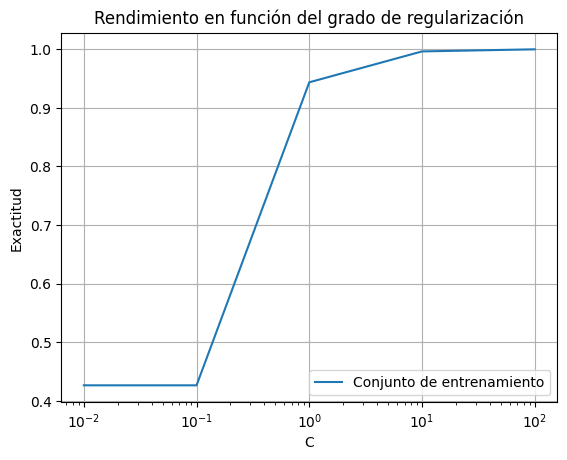

In [ ]:
rendimientos, valoresC = [], []
for c in np.arange(-2, 3):
    svm = SVC(kernel='rbf', random_state=10, gamma=1.0, C=10.**c)
    svm.fit(X_entrenamiento_std, y_entrenamiento)
    rendimientos.append(svm.score(X_entrenamiento_std,
                                               y_entrenamiento))
    valoresC.append(10.**c)
plt.plot(valoresC, rendimientos, label='Conjunto de entrenamiento')
plt.ylabel('Exactitud')
plt.xlabel('C')
plt.title('Rendimiento en función del grado de regularización')
plt.legend(loc='lower right')
plt.grid()
plt.xscale('log')
plt.show()

Exactitud en el conjunto test:

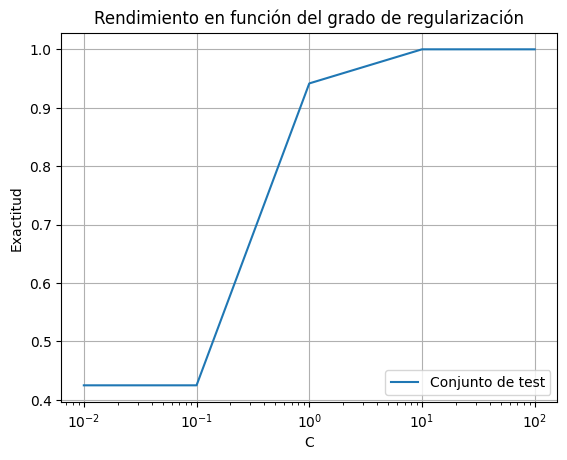

In [ ]:
rendimientos, valoresC = [], []
for c in np.arange(-2, 3):
    svm = SVC(kernel='rbf', random_state=10, gamma=1.0, C=10.**c)
    svm.fit(X_test_std, y_test)
    rendimientos.append(svm.score(X_test_std, y_test))
    valoresC.append(10.**c)
plt.plot(valoresC, rendimientos, label='Conjunto de test')
plt.ylabel('Exactitud')
plt.xlabel('C')
plt.title('Rendimiento en función del grado de regularización')
plt.legend(loc='lower right')
plt.grid()
plt.xscale('log')
plt.show()

**Apartado c**

In [ ]:
svm = SVC(kernel='rbf', random_state=10, gamma=1.0, C=100.0)
svm.fit(X_entrenamiento_std, y_entrenamiento)

SVC(C=100.0, gamma=1.0, random_state=10)

In [ ]:
clasesPredichas = svm.predict(X_test_std)

Diagrama con la predicción del conjunto test:

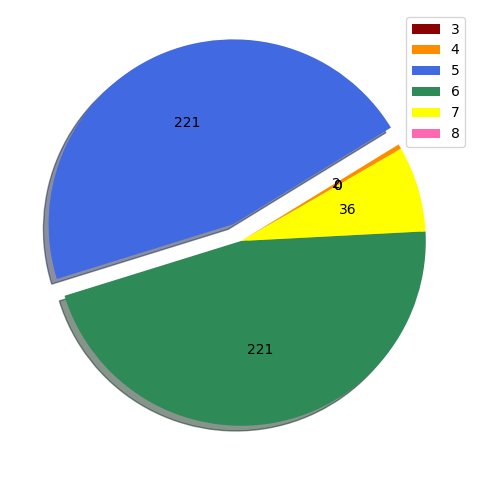

In [ ]:
import matplotlib.pyplot as plt

# Preparamos los datos a dibujar
etiquetas = ['3', '4', '5', '6', '7', '8']
tamaños = [np.sum((clasesPredichas == 3)), np.sum((clasesPredichas == 4)),
           np.sum((clasesPredichas == 5)), np.sum((clasesPredichas == 6)), np.sum((clasesPredichas == 7)),
           np.sum((clasesPredichas == 8))]
colores = ['darkred', 'darkorange', 'royalblue', 'seagreen', 'yellow', 'hotpink']
explode = (0, 0, 0.1, 0, 0, 0)  # Cortar el primer sector

# Dibujamos con sombra, definiendo un ángulo de giro y un formato para los
# porcentajes
plt.figure(figsize=(10, 6))
plt.pie(tamaños, explode=explode, labels=etiquetas, colors=colores, autopct=lambda p: f'{p * sum(tamaños) / 100:.0f}', shadow=True, labeldistance=None, startangle=30)
plt.legend()
plt.show()

Diagrama con las clases deseadas del conjunto test:

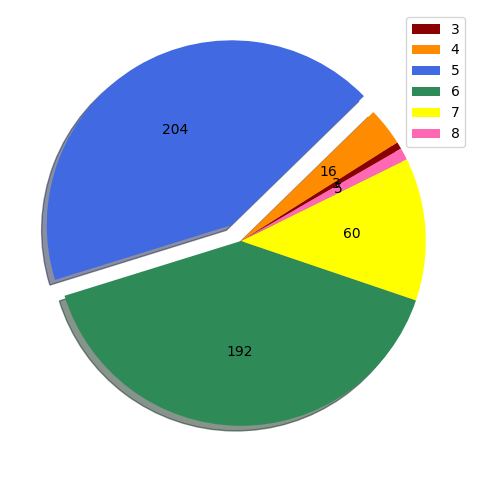

In [ ]:
import matplotlib.pyplot as plt

# Preparamos los datos a dibujar
etiquetas = ['3', '4', '5', '6', '7', '8']
tamaños = [np.sum((y_test == 3)), np.sum((y_test == 4)),
           np.sum((y_test == 5)), np.sum((y_test == 6)), np.sum((y_test == 7)),
           np.sum((y_test == 8))]
colores = ['darkred', 'darkorange', 'royalblue', 'seagreen', 'yellow', 'hotpink']
explode = (0, 0, 0.1, 0, 0, 0)  # Cortar el primer sector

# Dibujamos con sombra, definiendo un ángulo de giro y un formato para los
# porcentajes
plt.figure(figsize=(10, 6))
plt.pie(tamaños, explode=explode, labels=etiquetas, colors=colores, autopct=lambda p: f'{p * sum(tamaños) / 100:.0f}', shadow=True, labeldistance=None, startangle=30)
plt.legend()
plt.show()

**Apartado d**

Veamos si clasifica bien las muestras

In [ ]:
accuracy = accuracy_score(y_test, clasesPredichas)
print(f"Exactitud del modelo: {accuracy:.2f}")

Exactitud del modelo: 0.65


El modelo tiene una precisión de 0.65, lo cual significa que no clasifica del todo bien las muestras. De las gráficas anteriores podemos ver que las clases 3, 4 y 8, que son las que menos muestras tienen en el test, las descarta casi por completo en la predicción, habiendo solo 2 muestras en total entre las 3 clases, mientras que en las del conjunto test teníamos que había 24 muestras.

#EJERCICIO 6

**Apartado a**

In [ ]:
from sklearn.datasets import load_breast_cancer
data_breast_cancer = load_breast_cancer()
X=data_breast_cancer['data']
y=data_breast_cancer['target']

In [ ]:
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
max_nodos = range(2, 21)
accuracy_entrenamiento_gini, accuracy_test_gini = [], []
accuracy_entrenamiento_entropia, accuracy_test_entropia = [], []

In [ ]:
def precision_arboles(max_leaf_nodes, criterio):
    arbolCancer = DecisionTreeClassifier(criterion=criterio, max_leaf_nodes=max_leaf_nodes, random_state=10)
    arbolCancer.fit(X_entrenamiento, y_entrenamiento)

    acc_entrenamiento = accuracy_score(y_entrenamiento, arbolCancer.predict(X_entrenamiento))
    acc_test = accuracy_score(y_test, arbolCancer.predict(X_test))
    return acc_entrenamiento, acc_test

In [ ]:
for nodos in max_nodos:
    acc_entrenamiento, acc_test = precision_arboles(nodos, 'gini')
    accuracy_entrenamiento_gini.append(acc_entrenamiento)
    accuracy_test_gini.append(acc_test)

    acc_entrenamiento, acc_test = precision_arboles(nodos, 'entropy')
    accuracy_entrenamiento_entropia.append(acc_entrenamiento)
    accuracy_test_entropia.append(acc_test)

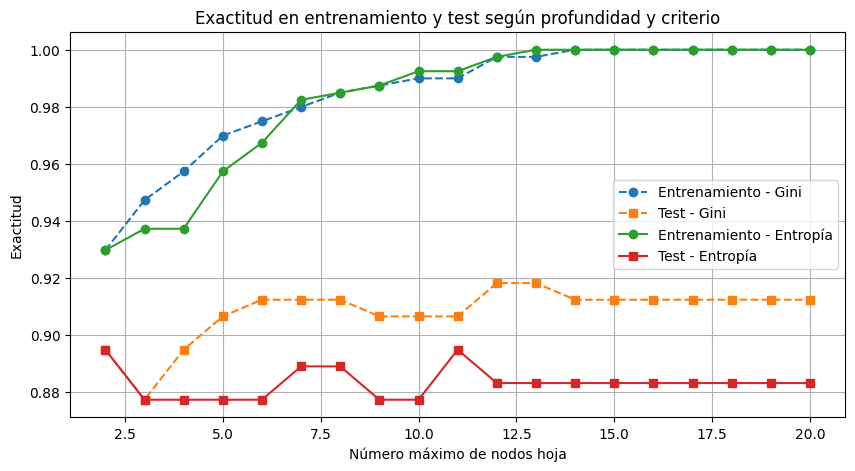

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(max_nodos, accuracy_entrenamiento_gini, label='Entrenamiento - Gini', linestyle='dashed', marker='o')
plt.plot(max_nodos, accuracy_test_gini, label='Test - Gini', linestyle='dashed', marker='s')
plt.plot(max_nodos, accuracy_entrenamiento_entropia, label='Entrenamiento - Entropía', linestyle='solid', marker='o')
plt.plot(max_nodos, accuracy_test_entropia, label='Test - Entropía', linestyle='solid', marker='s')

plt.xlabel('Número máximo de nodos hoja')
plt.ylabel('Exactitud')
plt.title('Exactitud en entrenamiento y test según profundidad y criterio')
plt.legend()
plt.grid()
plt.show()


**Apartado b**

Aumenta hasta llegar a 1 de exactitud en ambos casos. En este caso estaría clasificando todos los datos de entrenamiento a la perfección pero seguramente tendríamos un modelo sobreajustado.

**Apartado c**

Lo normal es que al aumentar tanto el número máximo de hojas, el modelo generalice peor, ya que puede sobreajustarse. Si comparamos la gráfica de entrenamiento y la de test (sobre todo con entropía), podemos ver que en entrenamiento la exactitud aumenta continuamente, mientras que en test se mantiene constante o aumenta muy poco, lo que puede significar que la capacidad de generalización empeora al incrementar el número máximo de nodos hoja.

**Apartado d**

In [ ]:
min_muestras = np.linspace(0.01, 1, 80)
accuracy_entrenamiento_gini_split, accuracy_test_gini_split = [], []
accuracy_entrenamiento_entropia_split, accuracy_test_entropia_split = [], []

In [ ]:
def precision_arboles_split(min_samples_split, criterio):
    arbolCancer = DecisionTreeClassifier(criterion=criterio, min_samples_split=min_samples_split, random_state=10)
    arbolCancer.fit(X_entrenamiento, y_entrenamiento)

    acc_entrenamiento = accuracy_score(y_entrenamiento, arbolCancer.predict(X_entrenamiento))
    acc_test = accuracy_score(y_test, arbolCancer.predict(X_test))
    return acc_entrenamiento, acc_test

In [ ]:
for valores in min_muestras:
    acc_entrenamiento, acc_test = precision_arboles_split(valores, 'gini')
    accuracy_entrenamiento_gini_split.append(acc_entrenamiento)
    accuracy_test_gini_split.append(acc_test)

    acc_entrenamiento, acc_test = precision_arboles_split(valores, 'entropy')
    accuracy_entrenamiento_entropia_split.append(acc_entrenamiento)
    accuracy_test_entropia_split.append(acc_test)

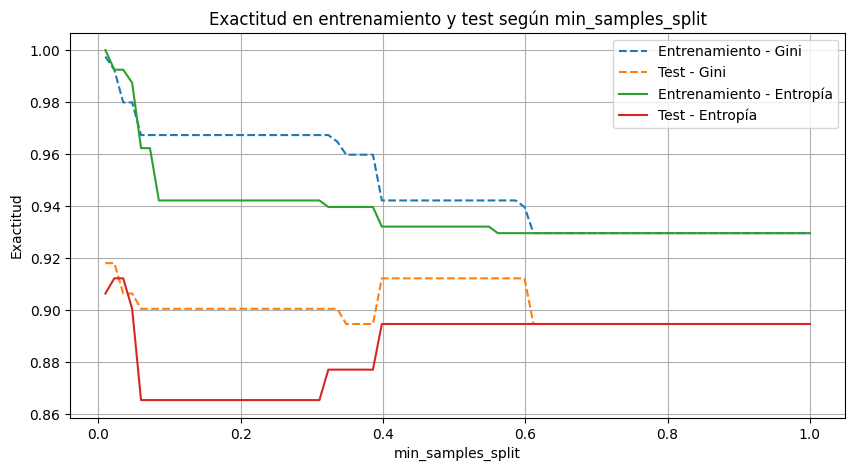

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(min_muestras, accuracy_entrenamiento_gini_split, label='Entrenamiento - Gini', linestyle='dashed')
plt.plot(min_muestras, accuracy_test_gini_split, label='Test - Gini', linestyle='dashed')
plt.plot(min_muestras, accuracy_entrenamiento_entropia_split, label='Entrenamiento - Entropía', linestyle='solid')
plt.plot(min_muestras, accuracy_test_entropia_split, label='Test - Entropía', linestyle='solid')

plt.xlabel('min_samples_split')
plt.ylabel('Exactitud')
plt.title('Exactitud en entrenamiento y test según min_samples_split')
plt.legend()
plt.grid()
plt.show()

**Apartado e**

Si existe, cuanto menor sea el número mínimo de muestras necesarias para dividir un nodo, mayor profundidad tendrá el árbol y mayor será el número de nodos hoja. En la gráfica anterior podíamos ver como la precisión en entrenamiento aumentaba al aumentar el número máximo de nodos hoja, aquí podemos ver como al aumentar el mínimo de muestras necesarias para dividir un nodo, la precisión en entrenamiento disminuye, se trata por tanto de una relación inversamente proporcional. Al igual que en la gráfica anterior, la precisión en test se mantiene constante por lo general.

#EJERCICIO 7

**Apartado a**

In [ ]:
from sklearn.datasets import load_breast_cancer
data_breast_cancer_remix2 = load_breast_cancer()
Xcancer=data_breast_cancer['data']
ycancer=data_breast_cancer['target']

In [ ]:
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(Xcancer, ycancer, test_size=0.3, stratify=ycancer)

In [ ]:
metricas = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'euclidean']
valores_vecinos = range(1, 41)

In [ ]:
accuracy_entrenamiento = {metrica: [] for metrica in metricas}
accuracy_test = {metrica: [] for metrica in metricas}

In [ ]:
tiempo_entrenamiento = {metrica: [] for metrica in metricas}
tiempo_test = {metrica: [] for metrica in metricas}

In [ ]:
import time

In [ ]:
for metrica in metricas:
    for valor in valores_vecinos:
        knn = KNeighborsClassifier(n_neighbors=valor, metric=metrica)

        start_entrenamiento = time.perf_counter()
        knn.fit(X_entrenamiento, y_entrenamiento)
        end_entrenamiento = time.perf_counter()

        y_pred_entrenamiento = knn.predict(X_entrenamiento)

        start_test = time.perf_counter()
        y_pred_test = knn.predict(X_test)
        end_test = time.perf_counter()

        accuracy_entrenamiento[metrica].append(accuracy_score(y_entrenamiento, y_pred_entrenamiento))
        accuracy_test[metrica].append(accuracy_score(y_test, y_pred_test))
        tiempo_entrenamiento[metrica].append(end_entrenamiento - start_entrenamiento)
        tiempo_test[metrica].append(end_test - start_test)

In [ ]:
def graficas(resultados, titulo, ylabel):
    plt.figure(figsize=(10, 5))
    for metrica in metricas:
        plt.plot(valores_vecinos, resultados[metrica], label=metrica)
    plt.xlabel("Número de Vecinos (k)")
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.legend()
    plt.grid()
    plt.show()

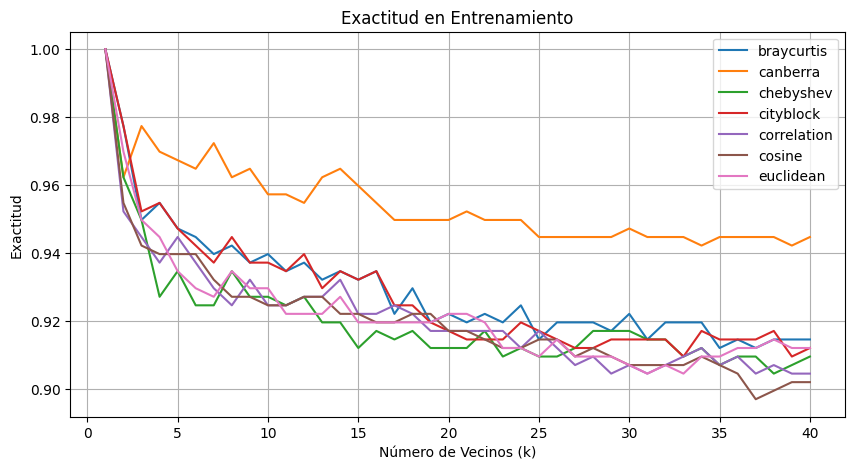

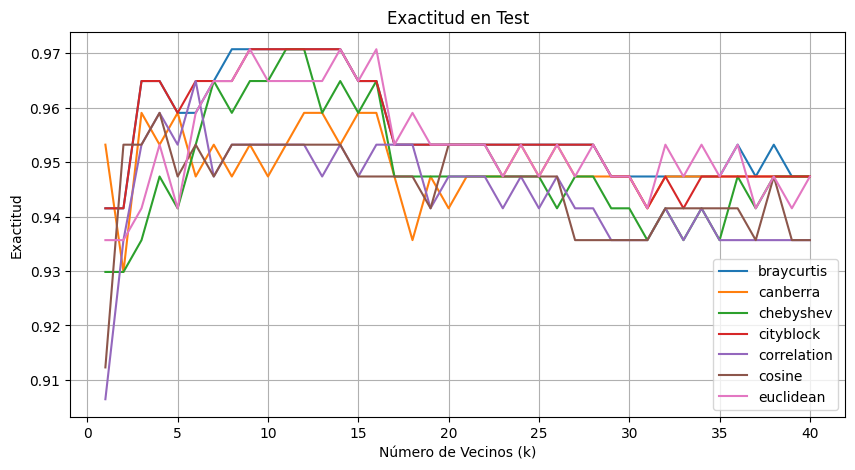

In [ ]:
graficas(accuracy_entrenamiento, "Exactitud en Entrenamiento", "Exactitud")
graficas(accuracy_test, "Exactitud en Test", "Exactitud")

**Apartado b**

Como podemos ver en la gráfica de entrenamiento, al aumentar el número de vecinos, el ajuste a los datos disminuye. En este caso, podríamos decir que al aumentar el número de vecinos el modelo generaliza más.

**Apartado c**

La capacidad de generalización aumenta al aumentar el número de vecinos, ya que si el número de vecinos espequeño, el modelo puede ajustarse demasiado a los datos y tener sobreajuste. En cambio, si el número de vecinos es lo suficientemente grande, el modelo generalizará mejor ya que se fijará en más muestras que tenga alrededor. También es cierto que la capacidad de generalización mejorará hasta un cierto punto, ya que si tomamos un k demasiado grande el modelo no va a ser capaz de distinguir entre clases.

**Apartado d**

Modificamos el código anterior para medir los tiempos de CPU.

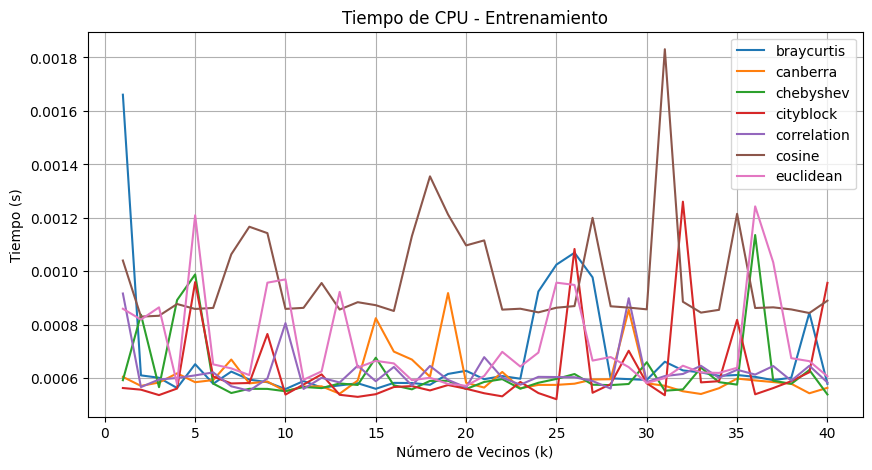

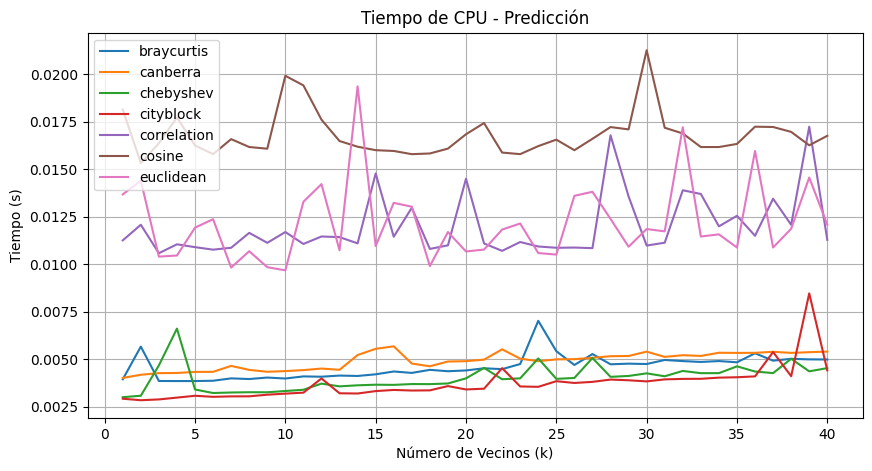

In [ ]:
graficas(tiempo_entrenamiento, "Tiempo de CPU - Entrenamiento", "Tiempo (s)")
graficas(tiempo_test, "Tiempo de CPU - Predicción", "Tiempo (s)")

**Apartado e**

En entrenamiento podemos ver que el tiempo de CPU se mantiene constante con el aumento de vecinos, sin embargo, en test, podemos ver como hay un ligero aumento del tiempo de CPU al aumentar el número de vecinos. Esto se debe a que el modelo KNN en entrenamiento unicamente consiste en almacenar las muestras por clases, mientras que en test debe buscar los vecinos más cercanos de cada muestra, por tanto tiene que comparar más vecinos antes de clasificar cada muestra y esto hace que aumente el tiempo de CPU.